# Algorithmic composition by conditional GAN (like MidiNet).

This notebook demonstrates an Algorithmic Composition, which is the technique of using algorithms, especially recent machine learning algorithms, to create music.

Here, referring to the case of *MidiNet* model for symbolic-domain music generation(Yang, L. C., et al., 2017), Conditional GAN is used as an algorithm for composing music. MidiNet can be expanded to generate music with multiple MIDI channels (i.e. tracks), using convolutional and *de*convolutional neural networks.

<img src="img/system_diagram_of_the_MidiNet.png" />
<div>
Yang, L. C., Chou, S. Y., & Yang, Y. H. (2017). MidiNet: A convolutional generative adversarial network for symbolic-domain music generation. arXiv preprint arXiv:1703.10847., p3.
</div>

## Import and setup modules.

Make settings for this library and for visualization.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = "retina"
plt.style.use("fivethirtyeight")

In [2]:
from pycomposer.gancomposable._mxnet.conditional_gan_composer import ConditionalGANComposer

Let's make it possible to confirm later that learning is working according to GAN theory by the logger of Python.

In [3]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR
logger = getLogger("accelbrainbase")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

Instantiate the required class.

In [4]:
gan_composer = ConditionalGANComposer(
    # `list` of Midi files to learn.
    midi_path_list=[
        "../../../../../Downloads/Beethoven_gekko_1_k.mid"
    ], 
    # Batch size.
    batch_size=40,
    # The length of sequence that LSTM networks will observe.
    seq_len=8,
    # Learning rate in `Generator` and `Discriminator`.
    learning_rate=1e-05,
    # Time fraction or time resolution (seconds).
    time_fraction=0.5,
)

## Learning.

The learning algorithm is based on a mini-batch stochastic gradient descent training of generative adversarial nets. The number of steps to apply to the discriminator, `k_step`, is a hyperparameter.  For instance, Goodfellow, I. et al.(2014) used `k = 1`, the least expensive option. Not limited to this parameter, the appropriate value of the hyperparameter is unknown.

In [5]:
gan_composer.learn(iter_n=1000, k_step=1)

----------------------------------------------------------------------------------------------------
Iterations: (100/1000)
----------------------------------------------------------------------------------------------------
The discriminator's turn.
----------------------------------------------------------------------------------------------------
The discriminator's posterior(mean): 0.5017484426498413
The discriminator's loss(mean): -1.5655049085617065
The discriminator's feature matching loss(mean): 0.01570046693086624
----------------------------------------------------------------------------------------------------
The generator's turn.
----------------------------------------------------------------------------------------------------
The generator's loss(mean): -0.8373593
The discriminator's posterior(mean): 0.54766124
----------------------------------------------------------------------------------------------------
Iterations: (200/1000)
------------------------------------

The generator's turn.
----------------------------------------------------------------------------------------------------
The generator's loss(mean): -0.7382029
The discriminator's posterior(mean): 0.49013042


## Visualization.



In [6]:
generative_loss_arr, discriminative_loss_arr, posterior_logs_arr, feature_matching_loss_arr  = gan_composer.extract_logs()

The shape is:
- `np.ndarray` of probabilities inferenced by the `discriminator` (mean) in the `discriminator`'s update turn.
- `np.ndarray` of probabilities inferenced by the `discriminator` (mean) in the `generator`'s update turn.
- `np.ndarray` of posterior(mean).
- `np.ndarray` of losses of the feature matching.

#### Logs of posterior.

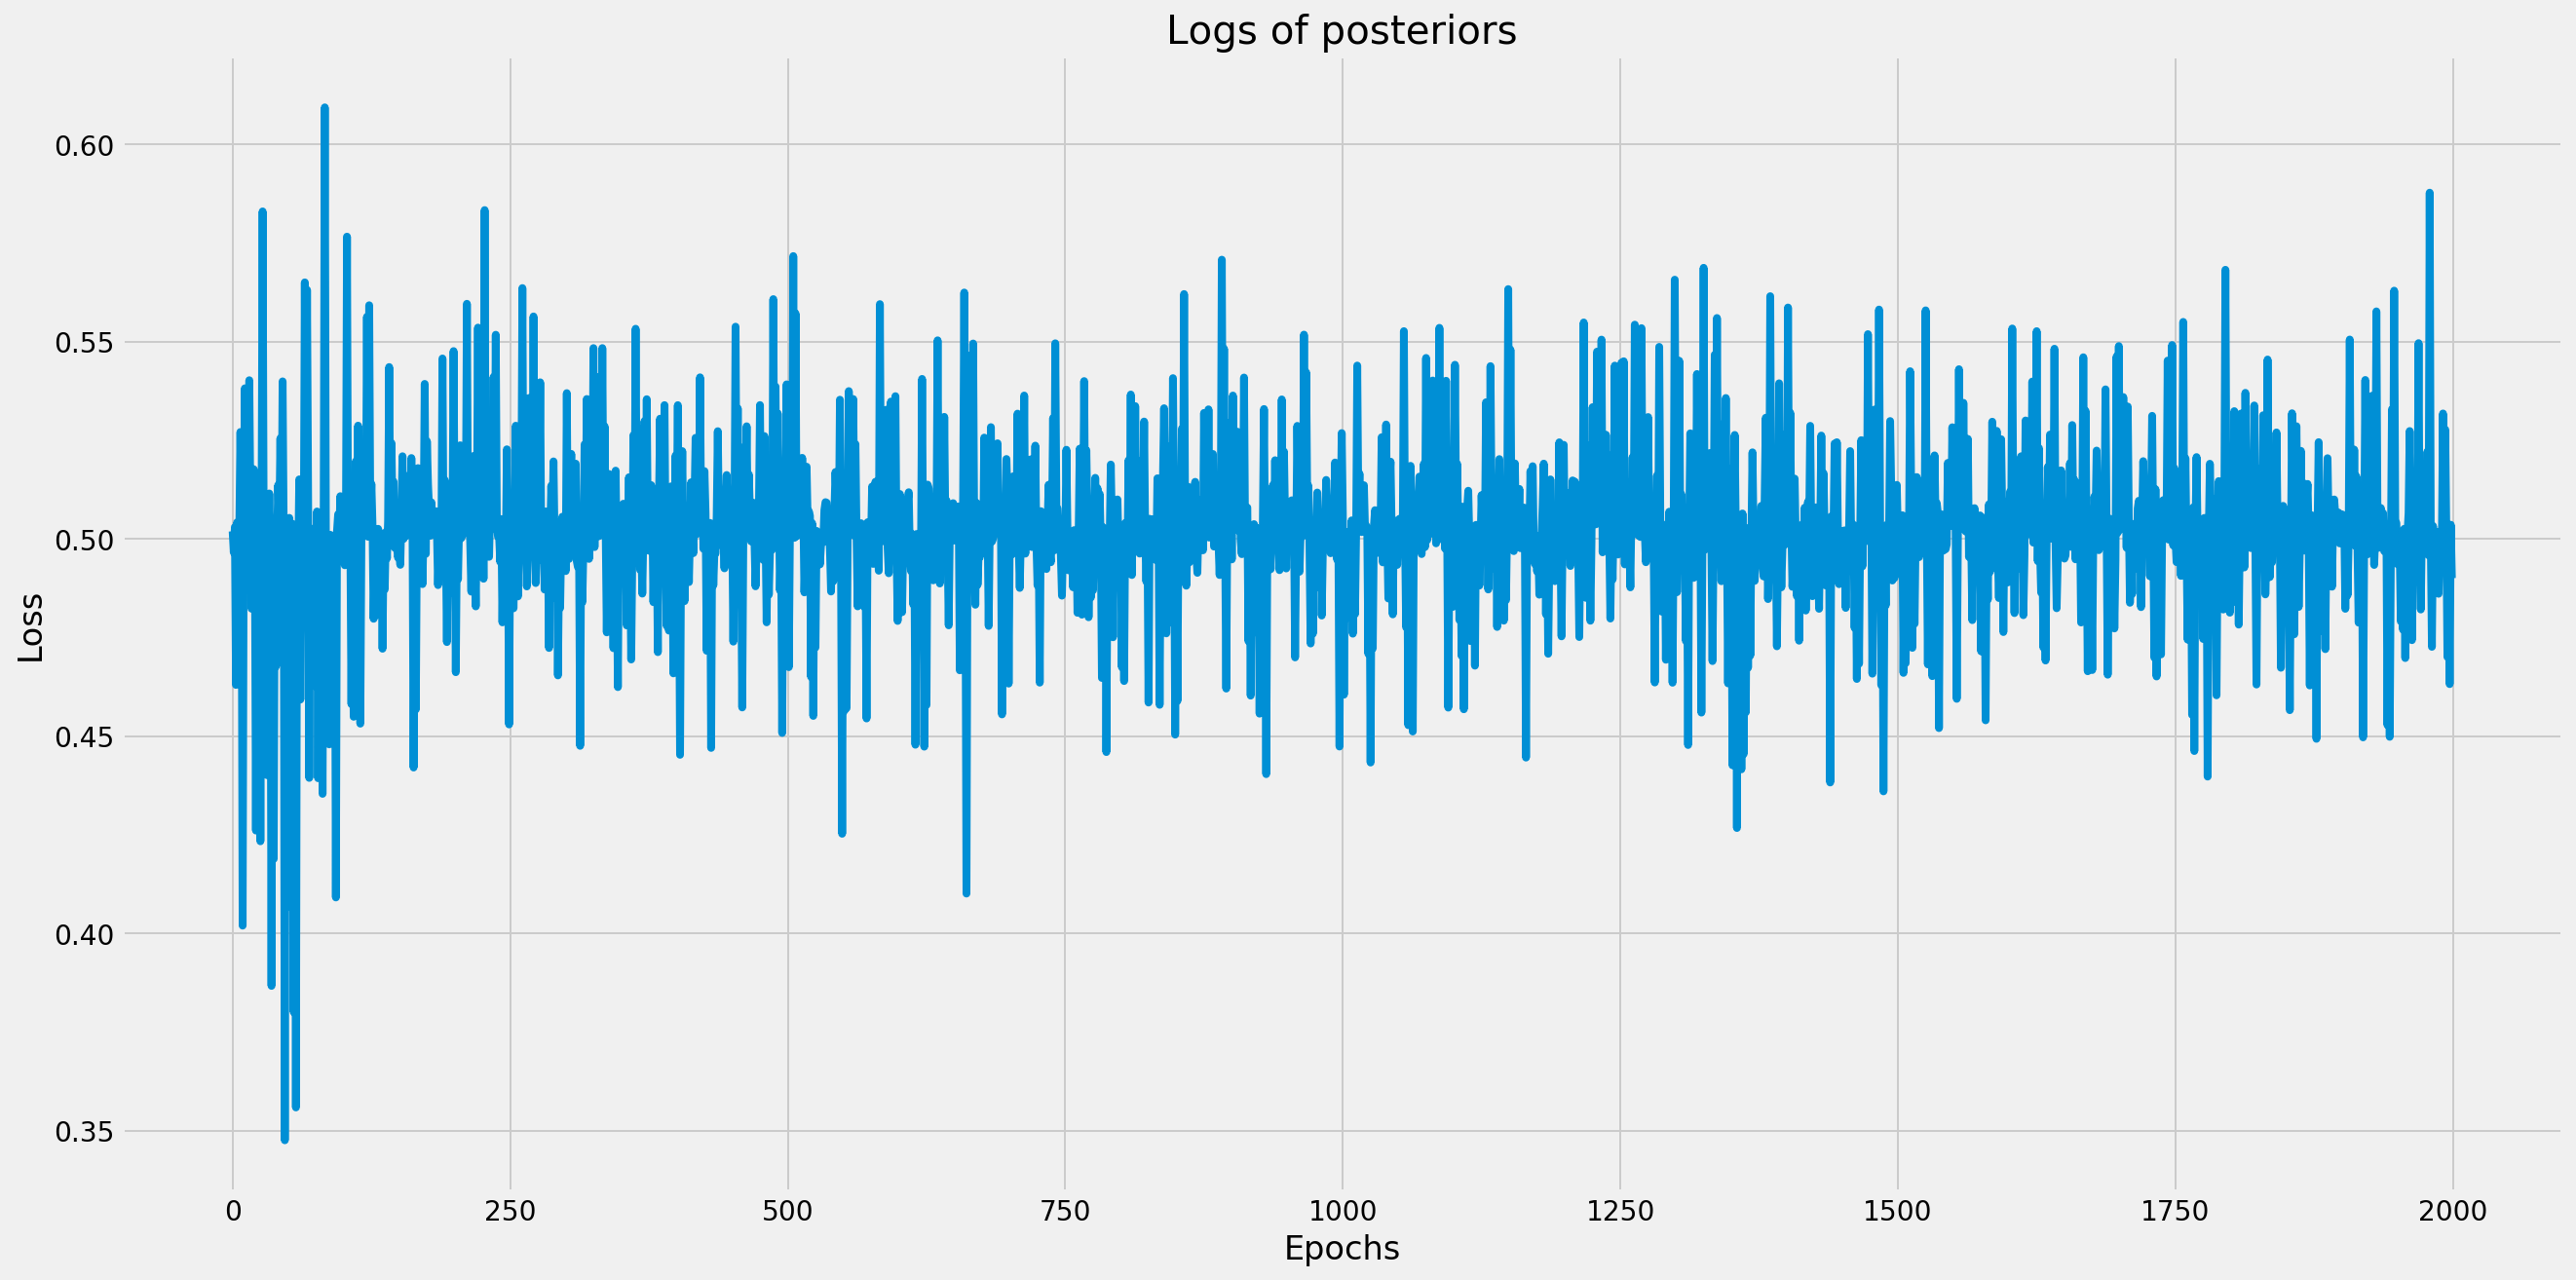

In [7]:
plt.figure(figsize=(20, 10))

plt.plot(posterior_logs_arr)
plt.title("Logs of posteriors")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Inferencing.

In [9]:
gan_composer.compose(
    file_path="../../../../../Documents/demo.midi", 
    velocity_mean=None, 
    velocity_std=None
)

# References.

- Goodfellow, I., Pouget-Abadie, J., Mirza, M., Xu, B., Warde-Farley, D., Ozair, S., ... & Bengio, Y. (2014). Generative adversarial nets. In Advances in neural information processing systems (pp. 2672-2680).
- Mirza, M., & Osindero, S. (2014). Conditional generative adversarial nets. arXiv preprint arXiv:1411.1784.
- Yang, L. C., Chou, S. Y., & Yang, Y. H. (2017). MidiNet: A convolutional generative adversarial network for symbolic-domain music generation. arXiv preprint arXiv:1703.10847.